In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman' 
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  

df = pd.read_csv('../data/raw/ev_charging_station.csv', encoding='cp949')  

    설치년도    데이터수
0   2014       1
1   2015      12
2   2016     210
3   2017    7790
4   2018   11520
5   2019   13039
6   2020   13440
7   2021   29705
8   2022   98695
9   2023  114792
10  2024  114796
11  2025   23812


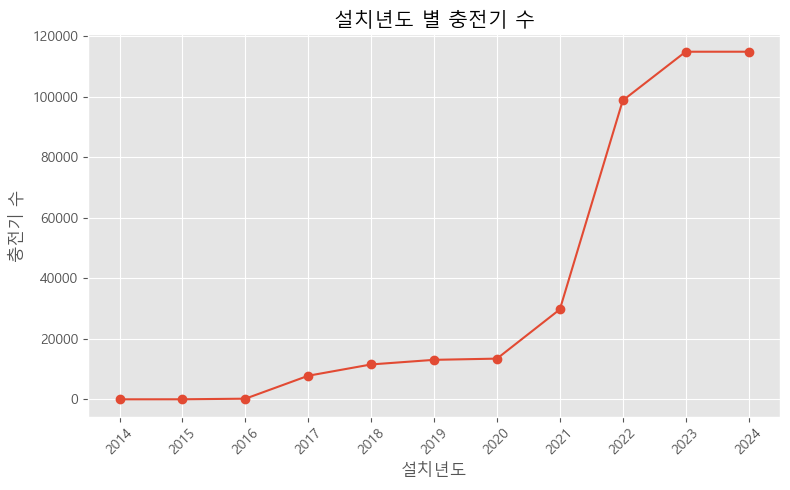

In [10]:
# 2) 연도 리스트 생성
years = list(range(2014, 2026))

# 3) 설치년도별 카운트
counts = (
    df['충전기설치년도']
    .value_counts()                     
    .reindex(years, fill_value=0)      
    .sort_index()                       
)

counts_df = counts.reset_index()
counts_df.columns = ['설치년도', '데이터수']
print(counts_df)

years = list(range(2014, 2025))

counts = (
    df['충전기설치년도']
    .value_counts()
    .reindex(years, fill_value=0)
    .sort_index()
)

plt.figure(figsize=(8, 5))
plt.plot(counts.index, counts.values, marker='o') 
plt.xticks(years, rotation=45)
plt.xlabel('설치년도')
plt.ylabel('충전기 수')
plt.title('설치년도 별 충전기 수')
plt.grid(True)
plt.tight_layout()
plt.show()

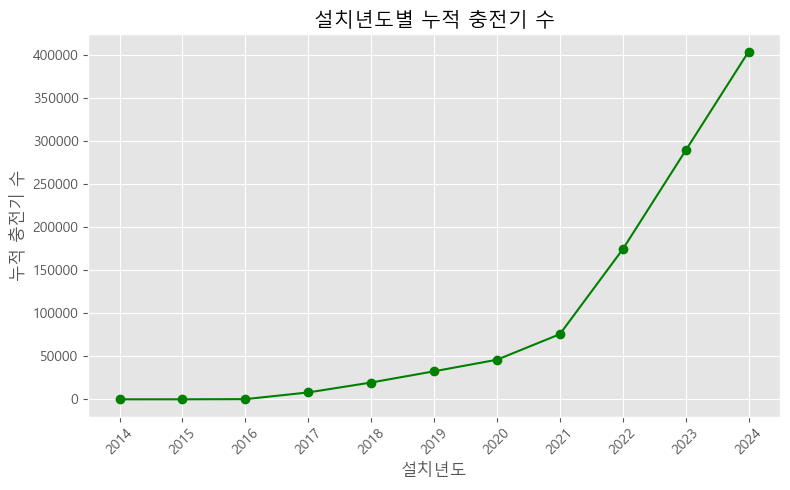

In [11]:
# 누적합 계산
cumulative_counts = counts.cumsum()

# 누적 충전기 수 시각화
plt.figure(figsize=(8, 5))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', color='green')
plt.xticks(cumulative_counts.index, rotation=45)
plt.xlabel('설치년도')
plt.ylabel('누적 충전기 수')
plt.title('설치년도별 누적 충전기 수')
plt.grid(True)
plt.tight_layout()
plt.show()


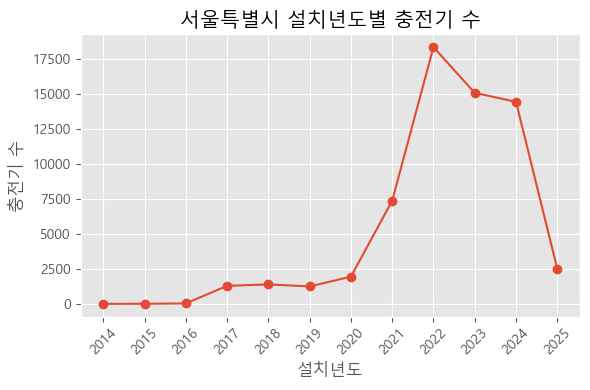

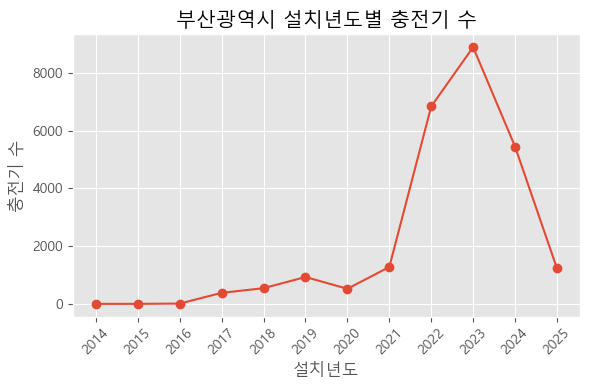

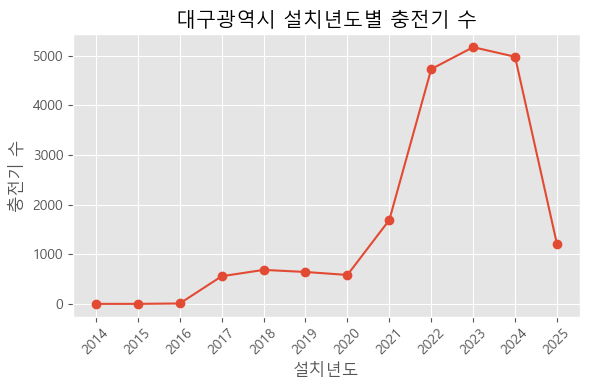

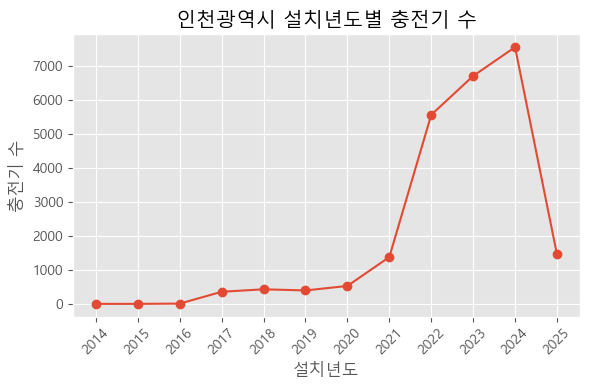

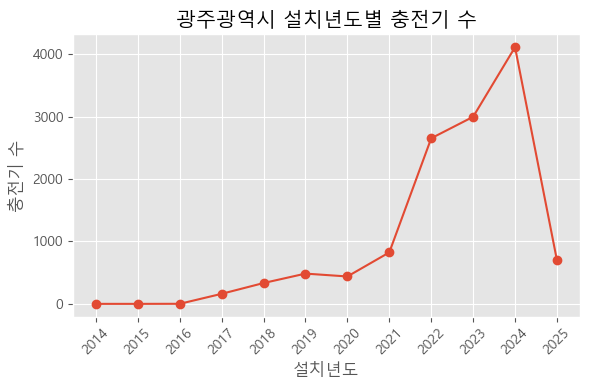

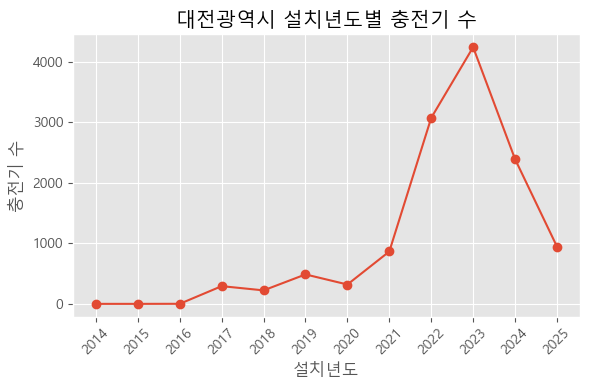

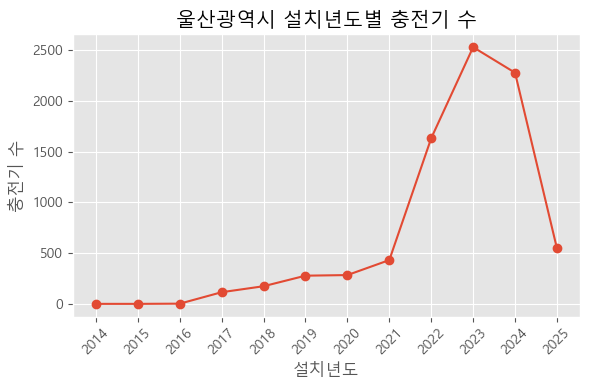

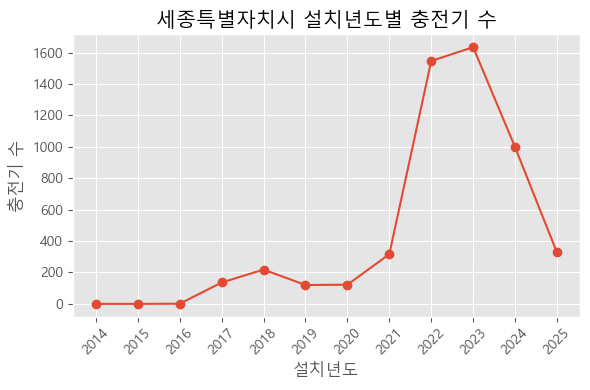

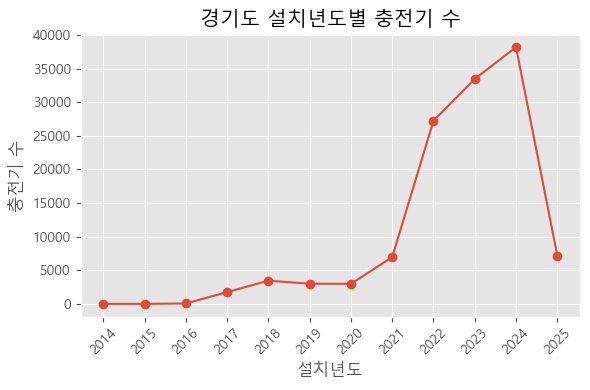

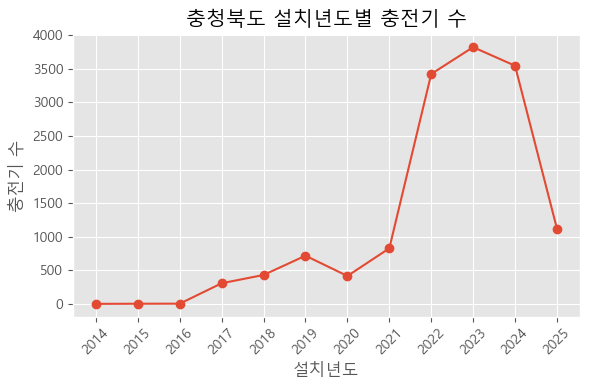

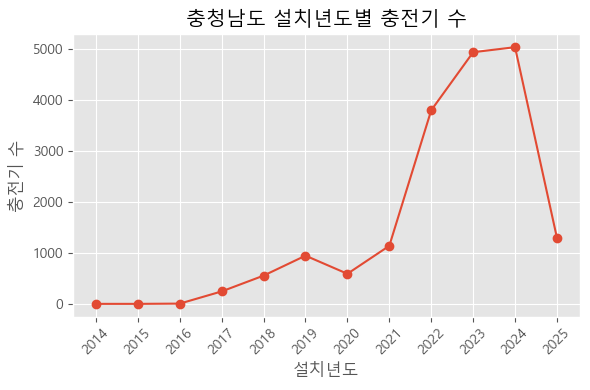

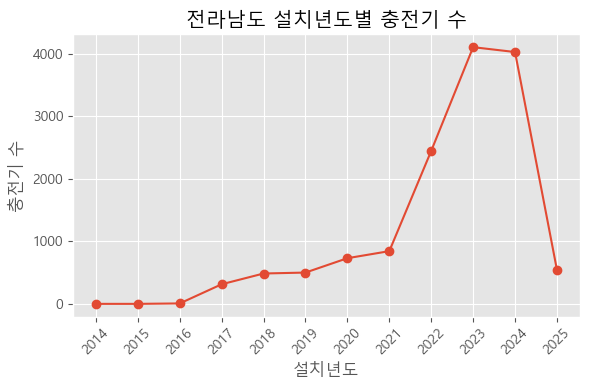

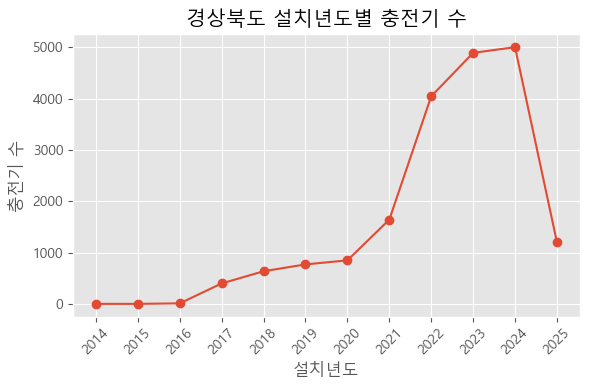

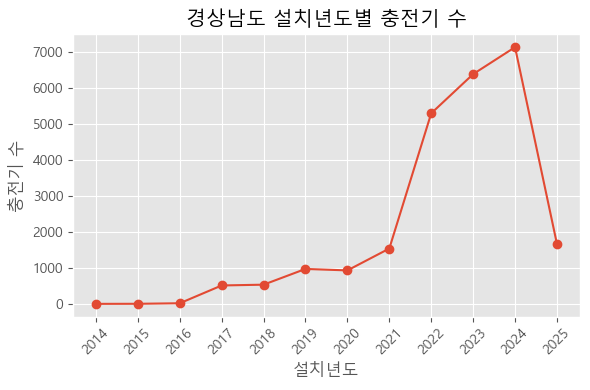

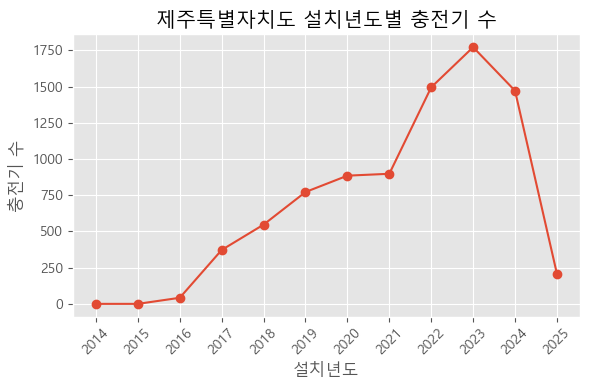

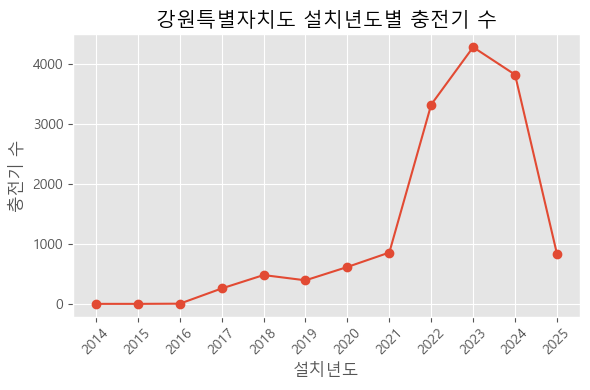

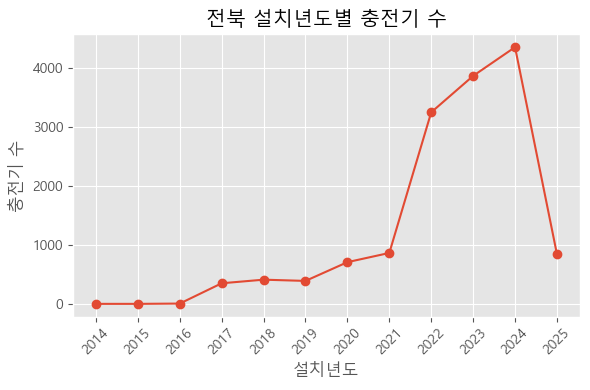

In [12]:
years = list(range(2014, 2026))

region_map = {
    11: '서울특별시',
    26: '부산광역시',
    27: '대구광역시',
    28: '인천광역시',
    29: '광주광역시',
    30: '대전광역시',
    31: '울산광역시',
    36: '세종특별자치시',
    41: '경기도',
    43: '충청북도',
    44: '충청남도',
    46: '전라남도',
    47: '경상북도',
    48: '경상남도',
    50: '제주특별자치도',
    51: '강원특별자치도',
    52: '전북'
}

counts = (
    df
    .groupby(['지역코드', '충전기설치년도'])
    .size()
    .unstack(level=1, fill_value=0)
    .reindex(columns=years, fill_value=0)
)


for code, name in region_map.items():
    if code in counts.index:
        y = counts.loc[code]
    else:
        y = pd.Series(0, index=years)
    
    plt.figure(figsize=(6, 4))
    plt.plot(years, y.values, marker='o')
    plt.title(f'{name} 설치년도별 충전기 수')
    plt.xlabel('설치년도')
    plt.ylabel('충전기 수')
    plt.xticks(years, rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    counts.to_csv('../data/processed/region_year_counts_matrix.csv', encoding='cp949')
